In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import shire as sh
import numpy as np

### Preprocessing Part

In [11]:
images = sh.ImageSeries(path="../../GitHub_Data/Particle_Tracking/bdnf rfp 600ap 3mW.tif")


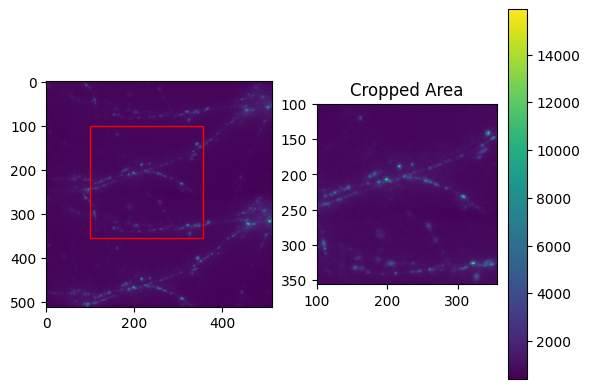

In [7]:
cropped_images = images.crop([100, 100], 256, 256, illustrate=True)

Smoothing done, the shape of the filtered images is (1593, 256, 256)


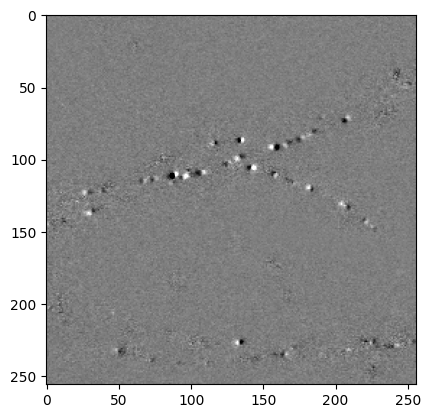

array([[  -3.90236938,  -60.54300015,  -68.1609193 , ..., -141.01666033,
          -6.4839305 ,  -60.56324255],
       [ -25.07952367,  -13.35911946,  -43.23838411, ...,    8.7483814 ,
          -5.62314032,  -11.41354422],
       [  35.90497702,  109.46690344,   68.73724095, ...,  -58.13363853,
         -43.8580076 ,  -72.28369026],
       ...,
       [ -25.52196724, -158.02888644,   23.66969267, ...,   67.36154394,
          29.24815035,   75.42004312],
       [   3.03586858,   42.47907971,  -28.43571685, ...,    2.56246609,
          92.90835959,   49.73959359],
       [ -10.26563899,  -42.2205642 ,   14.25750878, ...,  -34.1055717 ,
          64.22218112,  -53.06885433]])

In [12]:
images = cropped_images.smooth(illustrate=False)
bgrm_images = images.remove_background(separation=5)
bgrm_images.head(illustrate=True)

### Recovery Part

In [16]:
from recovery import Recovery
recovery = Recovery(sigma=(0.2,0.2), size=(8,8), scale=(6,6), n_directions=23)
print(recovery.stage)
recovery.compute_flow(bgrm_images)
print(recovery.stage)
recovery.estimate(thresholding=20)
print(recovery.stage)

Initialised
Flow Computed
Direction Estimated, the info is stored in df_p and df_d
Direction Estimated


In [17]:
recovery.df_p

,Frame,Index,Position,X,Y
0,0,0,"[111, 89]",111,89
1,0,1,"[92, 158]",92,158
2,0,2,"[106, 142]",106,142
3,0,3,"[87, 135]",87,135
4,0,4,"[227, 134]",227,134
...,...,...,...,...,...
2781,99,17,"[43, 241]",43,241
2782,99,18,"[87, 135]",87,135
2783,99,19,"[139, 24]",139,24
2784,99,20,"[120, 44]",120,44


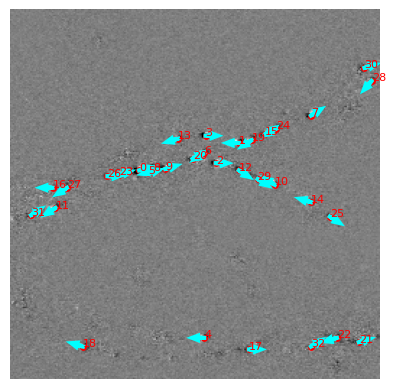

In [14]:
recovery.plot()

In [183]:
recovery.track_all()

Particle: 0 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 1 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 2 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 / 90
Frame: 45 / 90
Frame: 50 / 90
Frame: 55 / 90
Frame: 60 / 90
Frame: 65 / 90
Frame: 70 / 90
Frame: 75 / 90
Frame: 80 / 90
Frame: 85 / 90
Particle: 3 / 16
Frame: 0 / 90
Frame: 5 / 90
Frame: 10 / 90
Frame: 15 / 90
Frame: 20 / 90
Frame: 25 / 90
Frame: 30 / 90
Frame: 35 / 90
Frame: 40 

In [8]:
recovery.df_all

NameError: name 'recovery' is not defined